In [ ]:
import librosa
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load an audio file
audio, sr = librosa.load('/content/drive/MyDrive/Master_Mouse_Project/Submission/Task5/audios/0_CQ_Ultrasound recording.wav')

# Audio Feature Extraction
# Spectral centroid:
#MFCC: Mel-frequency cepstral coefficients

# Calculate the spectrogram
spectrogram = librosa.stft(audio)

# Extract the spectral centroid feature
spectral_centroids = librosa.feature.spectral_centroid(S=np.abs(spectrogram), sr=sr)

# Extract other audio features
mfccs = librosa.feature.mfcc(y=audio, sr=sr)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Concatenate and normalize the features
features = np.concatenate((spectral_centroids, mfccs), axis=0)
scaler = StandardScaler()
features = scaler.fit_transform(features.T)

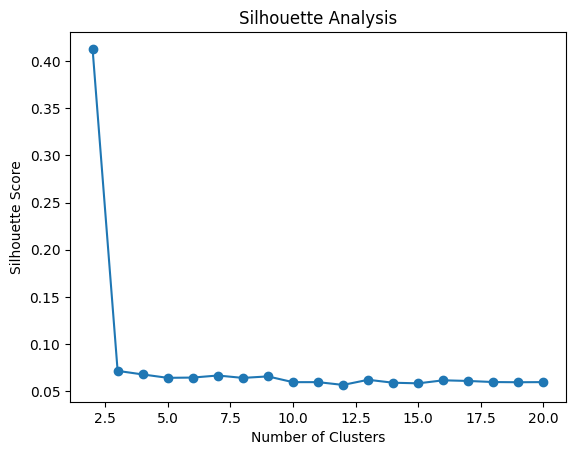

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Perform clustering with different numbers of clusters
min_clusters = 2
max_clusters = 20
cluster_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    labels = kmeans.fit_predict(features)
    cluster_scores.append(silhouette_score(features, labels))

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), cluster_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, n_init=10)  # Set the value of n_init explicitly
labels = kmeans.fit_predict(features)

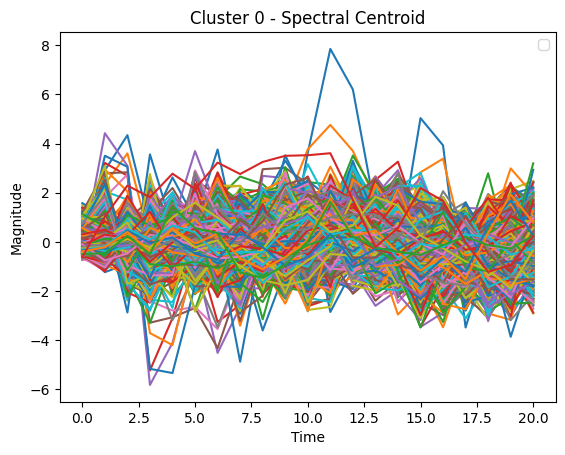

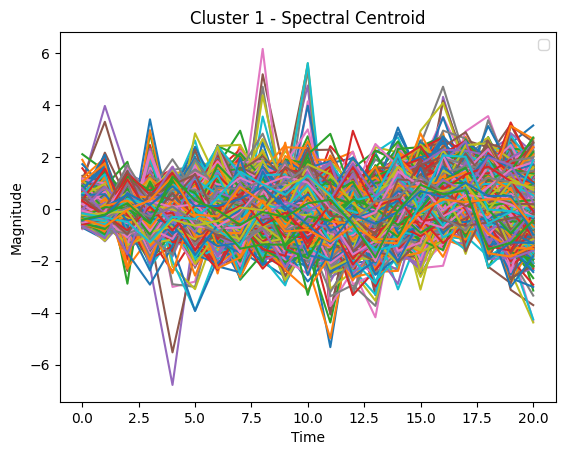

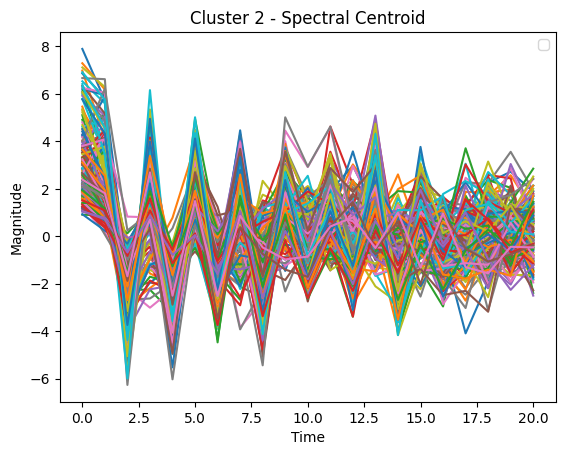

In [ ]:
import matplotlib.pyplot as plt

# Analyze clustering results
for label in np.unique(labels):
    cluster_samples = features[labels == label]
    # Perform further analysis or visualization on each cluster
    # Example: Plotting the spectral centroid feature for each cluster
    plt.figure()
    #for i, sample in enumerate(cluster_samples):
            #plt.plot(sample, label=f'Sample {i+1}')
    for sample in cluster_samples:
        plt.plot(sample)
    plt.title(f'Cluster {label} - Spectral Centroid')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()